<a href="https://colab.research.google.com/github/sree268/Machine-Learning/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding gradient descent

Starting with a simple problem, we are going to understand working of gradient descent in this notebook.  
  
Take one dimensional problem, we're planning to build a house between two tower's which supplies power to the house. We decided to have power supply from both the towers so that we can have a back up even one gets broke down. The power cabel costs twice the length of it.    

So the goal is to find a point to build a house, such that cost of the cable will be minimum.

In [79]:
# Import required modules
from sympy import *              #A library that provides symbolic differentiation
from sympy.utilities.lambdify import lambdify
from jax import grad             #A function to perform automatic differentiation
import jax.numpy as jnp          #A wrapped version of NumPy to use JAX premitives
import numpy as np               #A library to deal with math
import matplotlib.pyplot as plt  #A library for programming plot generation

%matplotlib inline

Say house and towers align in a straight line, X-axis

In [89]:
a = 1         #Point of tower a in the straight line
b = 6         #Point of tower b in the straight line
x = None      #Point of the house

In [60]:
#Function for plotting positions
def plot_points(x_points, y_points=None):
  if y_points==None:
    y_points = np.zeros(len(x_points))

  plt.plot(x_points[:-1], y_points[:-1], "bo",label="Towers")
  plt.plot(x_points[-1], y_points[-1], "go", label="House")
  plt.legend()

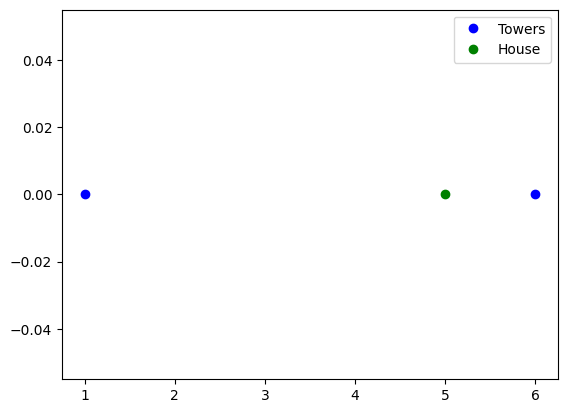

In [61]:
plot_points(np.array([a,b,5]))

## Cost of cable
Distance can be found by subtracting tower location from house location, and sum of the squares of both distances gives the cost.  
Let's have a look to symbolic representation of cost function.

In [92]:
#defining symbols
x = symbols('x')
cost = (x - a)**2 + (x - b)**2
cost

(x - 6)**2 + (x - 1)**2

In [93]:
#creating a function to calculate cost's for different x values
f_cost = lambdify(x, cost, "numpy")

In [95]:
print(f"Cost of cable, if house at point {1} : {f_cost(1)}")
print(f"Cost of cable, if house at point {5} : {f_cost(5)}")
print(f"Cost of cable, if house at point {9} : {f_cost(9)}")

Cost of cable, if house at point 1 : 25
Cost of cable, if house at point 5 : 17
Cost of cable, if house at point 9 : 73


In [104]:
#Function used for plotting
def plot_f1_and_f2(f1, f2=None, x_min=-1, x_max=8, label1="f(x)", label2="f'(x)"):
    x = np.linspace(x_min, x_max,100)

    # Setting the axes at the centre.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, f1(x), 'r', label=label1)
    if not f2 is None:
        # If f2 is an array, it is passed as it is to be plotted as unlinked points.
        # If f2 is a function, f2(x) needs to be passed to plot it.
        if isinstance(f2, np.ndarray):
            plt.plot(x, f2, 'bo', markersize=3, label=label2,)
        else:
            plt.plot(x, f2(x), 'b', label=label2)


    plt.xlabel("Point of house")
    plt.ylabel("Cost of cabel")
    plt.legend()

    plt.show()

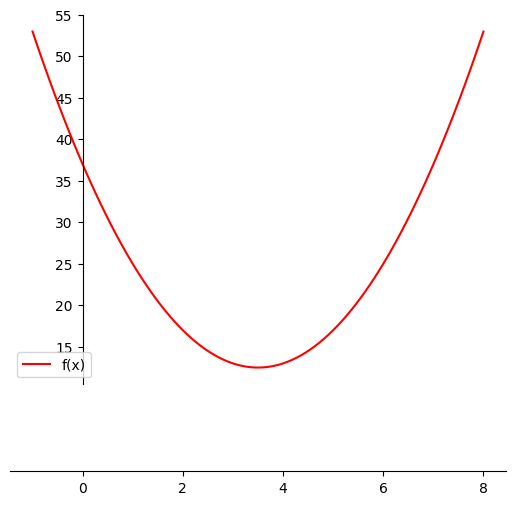

In [105]:
#let's visually look at the cost of cable for different house location's
plot_f1_and_f2(f_cost)

Cost of cable will be minimum at point some where in between 2 and 4. But how to find the exact point?  
Here come's the differentiation.
## Differentiation
We know that differentiation is all about rate of change at a particular instance. And it is equal to the slope of the graph at that point. If there is a function $f(x)$, then it's derivative is $f'(x)$ which gives slope for $f(x)$ at  point $x$. Slope can be positive, negative or even zero. When function increases respective with $x$ then slope is positive, if function decreases respective with increase of $x$ then slope is negative, and there is a point where line of slope will be parallel to x-axis which means zero slope. The slope will be zero at points where function reaches it's maximum or minimum.  
All we want is to find the point where function is minimum. Hence we want to find value of $x$ where $f'(x)=0$  
Let's calculate the derivative of our cost function $f(x)=(x-a)^2+(x-b)^2$

In [107]:
#Derivative of f_cost
cost_diff = diff((x-a)**2+(x-b)**2, x)
cost_diff

4*x - 14

In [113]:
#solving for f'(x)=0
x_f = solve(cost_diff, x)
x_f

[7/2]

Hence we can build a house at point 3.5

In [111]:
dfdx_cost = lambdify(x, cost_diff, "numpy")

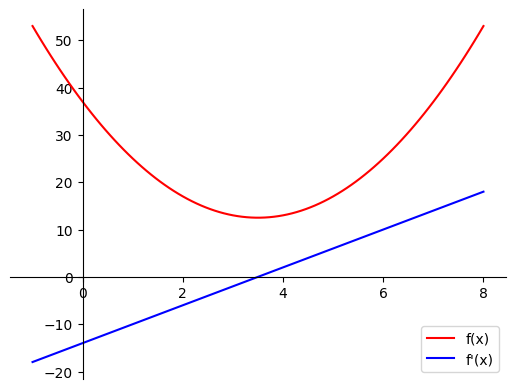

In [112]:
plot_f1_and_f2(f_cost, dfdx_cost)

In [118]:
#calculating minimum cost for cable
min_cost = cost.evalf(subs={x:x_f[0]})
min_cost

12.5000000000000